# Linear Systems and Differential Equations
Author: Jin Yeom (jinyeom@utexas.edu)

## Solving Linear Systems via Iterative Methods
Consider the following linear system,

$$
\begin{align}
3x_1 - 4x_2 &= -1 \\
x_1 + 2x_2 &= 3
\end{align}
$$

This linear system can be represented in a matrix form as follows,

$$\begin{bmatrix}3 & -4 \\ 1 & 2\end{bmatrix} 
\begin{bmatrix}x_1 \\ x_2\end{bmatrix}
= \begin{bmatrix}-1 \\ 3\end{bmatrix}$$

Now, this linear system can be solved using either Jacobi interation or Gauss-Seidel method. We'll begin with Jacobi iteration. Let's say that the iteration begins with $x = 0$. The linear system can be solved by iteratively updating $x$ via following recurrence,

$$x_{i + 1} = x_i - M^{-1} (Ax_i - b)$$

where $M^{-1} = \begin{bmatrix}\frac{1}{3} & 0 \\ 0 & \frac{1}{2}\end{bmatrix}$, $A = \begin{bmatrix}3 & -4 \\ 1 & 2\end{bmatrix}$, and $b = \begin{bmatrix}-1 \\ 3\end{bmatrix}$.

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
sns.set()

x =
[[0.98972354]
 [1.00385367]]
Ax =
[[-1.04624408]
 [ 2.99743088]]


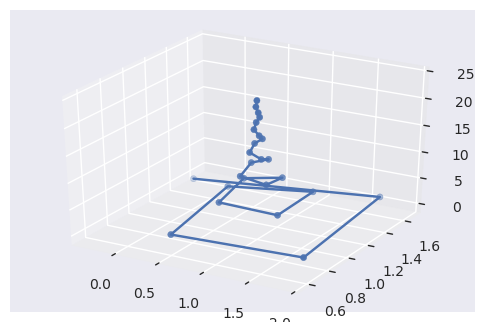

In [3]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection="3d")

A = np.array([[3, -4], [1, 2]])
b = np.array([[-1], [3]])
x = np.array([[0], [0]]) # initialized as 0
M_inv = np.linalg.inv(np.diag(np.diag(A)))
n = 25 # number of iterations

x1 = []
x2 = []
for i in range(n):
    x = x - M_inv.dot(A.dot(x) - b)
    x1.append(x[0][0])
    x2.append(x[1][0])
    
ax.plot(x1, x2, np.arange(n))
ax.scatter(x1, x2, np.arange(n))

print("x =")
print(x)
print("Ax =")
print(A.dot(x))

We can now define Jacobi iteration function, so that we can use it to solve differential equations.

In [4]:
def jacobi(A, x, b, n):
    """ Solve the argument linear system via Jacobi iteration. """
    M_inv = np.linalg.inv(np.diag(np.diag(A)))        
    for i in range(n):
        x = x - M_inv.dot(A.dot(x) - b)
    err = A.dot(x) - b
    return x, err

Just for fun, we'll try solving the same linear system with a different iterative method called Gauss-Seidel method. Gauss-Seidel uses the following recurrence for updating the solution:

$$x_{i + 1} = L_*^{-1}(b - Ux_i)$$

where $L_*$ is the lower triangular component of $A$, and $U$ its strictly upper triangular component.

x =
[[0.9999208]
 [1.0000396]]
Ax =
[[-1.00039602]
 [ 3.        ]]


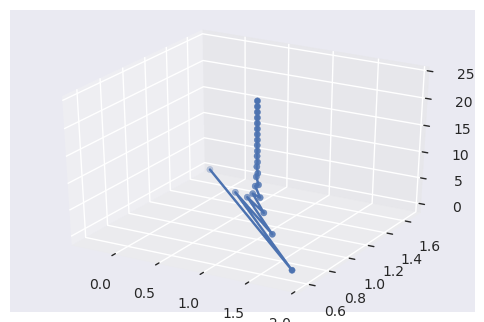

In [5]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection="3d")

A = np.array([[3, -4], [1, 2]])
b = np.array([[-1], [3]])
x = np.array([[0], [0]]) # initialized as 0
L_inv = np.linalg.inv(np.tril(A))
U = np.triu(A, 1)
n = 25 # number of iterations

x1 = []
x2 = []
for i in range(n):
    x = L_inv.dot(b - U.dot(x))
    x1.append(x[0][0])
    x2.append(x[1][0])

ax.plot(x1, x2, np.arange(n))
ax.scatter(x1, x2, np.arange(n))

print("x =")
print(x)
print("Ax =")
print(A.dot(x))

## Ordinary Differential Equation (ODE)

Consider the following ordinary differential equation,

$$\frac{\delta y}{\delta x} = y * sin(x)$$

with its initial condition $y(0) = 1$ in the interval $0 < x < 2$. We're going to solve the ODE, using finite difference methods to approximate $\frac{\delta y}{\delta x}$. Since the initial condition is $y(0) = 1$ and $0 < x < 2$, let's use forward difference method.

$$\frac{y(x + h) - y(x)}{h} = y * sin(x)$$

This equation can then be rearranged to express the recurrence of function $y$ as follows,

$$y(x + h) = y * (h * sin(x) + 1)$$

$y(h), y(2h), y(3h), \cdots, y(nh)$ can then be computed iteratively with this recurrence.

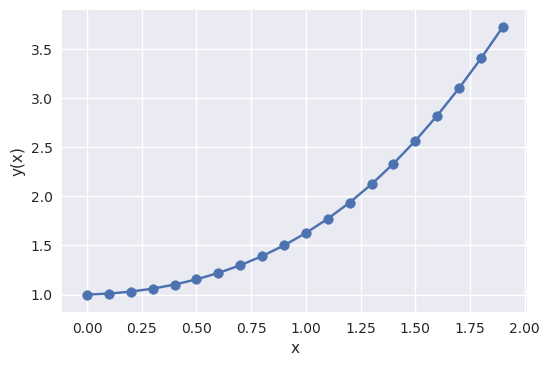

In [6]:
h = 0.1 # step size for approximation
y = [1] # initialize the list with the function's initial condition (y(0) = 1)
i = 1 # iterate within the interval 0 < i * h < 2
while 0 < i * h < 2:
    y.append(y[-1] * (h * math.sin(i * h) + 1))
    i += 1
    
plt.figure(dpi=100)
plt.xlabel("x")
plt.ylabel("y(x)")
plt.plot(h * np.arange(len(y)), y)
plt.scatter(h * np.arange(len(y)), y)

## Partial Differential Equation (PDE)

This time, we'll solve a partial differential equation. Consider the following one-dimensional diffusion equation

$$
\frac{\delta f}{\delta t} = D\frac{\delta^2 f}{\delta x^2}
$$

The solution $f(x, t)$ depends on both $x$ and $t$. Let's say we have a rod of length 10 meters, and the two ends of the rod are kept at a fixed temperature of $0^\circ C$, so $f(0, t) = 0.0$ and $f(10, t) = 0.0$. The temperature in the interior of the rod is initially $f(x, 0) = e^{-4(x-5)^2}$. To solve this PDE, we'll have to do the same thing we did for the ODE above, compute its discrete approximation,using finite-difference methods. For our problem, $D = 1$, $\Delta x = 0.25$, $\Delta t = 0.025$, $0 \leq x \leq 10$, and $0 \leq t \leq 10$. When discretized, the equation above becomes,

$$\frac{f(x, t + \Delta t) - f(x, t)}{\Delta t} \approx \frac{f(x + \Delta x, t) - 2 * f(x, t) + f(x - \Delta x, t)}{(\Delta x)^2}$$

which can be rearranged and simplified to a recurrence as follows

$$f(x, t + \Delta t)  = \frac{\Delta t * (f(x + \Delta x, t) + f(x - \Delta x, t)) - (2 * \Delta t - (\Delta x)^2) * f(x, t)}{(\Delta x)^2}$$

with an initial condition of $f(0, t) = f(10, t) = 0.0$ for all discrete $t$ values, and $f(x, 0) = e^{-4(x-5)^2}$ in between.

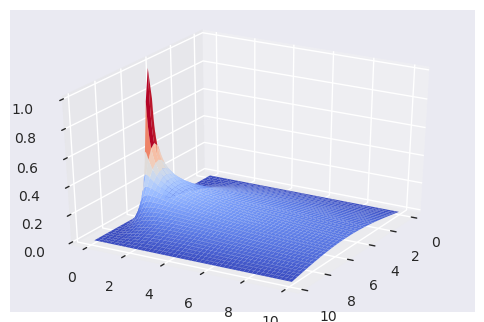

In [7]:
xmin = 0
xmax = 10
dx = 0.25
x = np.arange(xmin, xmax, dx)

tmin = 0
tmax = 10
dt = 0.025
t = np.arange(tmin, tmax, dt)

f = np.zeros((len(x), len(t)))
f[1:-2, 0] = np.exp(-4 * (x[1:-2] - 5) ** 2)

for j in np.arange(1, len(t)):
    for i in np.arange(1, len(x) - 1):
        f[i, j] = (dt * (f[i + 1, j - 1] + f[i - 1, j - 1]) - 
                  (2 * dt - dx ** 2) * f[i, j - 1]) / dx ** 2
        
fig = plt.figure(dpi=100)
x, t = np.meshgrid(x, t, indexing='ij')
ax = fig.add_subplot(111, projection="3d")
ax.view_init(30, 30)
ax.plot_surface(x, t, f, cmap=cm.coolwarm)